In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chicago-divvy-bicycle-sharing-data/data_raw.csv
/kaggle/input/chicago-divvy-bicycle-sharing-data/data.csv


## Case Study 1: How Does a Bike-Share Navigate Speedy Success?
### Scenario
I am a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, my team will design a new marketing strategy to convert casual riders into annual members.

### About the company
In 2016, Cyclistic launched a successful bike-share oering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members. Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, The director of marketing believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, she believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.
  

### The goal of this case study
The goal of this case study
Three questions will guide the future marketing program:
    1. How do annual members and casual riders use Cyclistic bikes differently?
    2. Why would casual riders buy Cyclistic annual memberships?     
    3. How can Cyclistic use digital media to influence casual riders to become members?
    
The director of marketing has assigned me the first question to answer: How do annual members and casual riders use Cyclistic bikes differently?
In this assignment, I will produce a report with the following deliverables:
    1.A clear statement of the business task
    2. A description of all data sources used
    3. Documentation of any cleaning or manipulation of data
    4. A summary of my analysis
    5. Supporting visualizations and key findings 

### About the data set:

The original dataset of this studycase is: Divvy’s, a bike-share program based in Chicago, data from May 2020 – April 2021.
To download the data, please use this [link](http://divvy-tripdata.s3.amazonaws.com/index.html). 
This data was made public by Motivate International Inc, under [this license](https://ride.divvybikes.com/data-license-agreement). Due to data privacy issues, personal information has been removed or encrypted.

I'm using the kaggle dataset in this notebook.

## Ask
Business Task In order to maximize the number of annual membership, I, data analyst, will find trend and patterns among casual riders and membership riders, and identify potential riders who can get benefit from annual membership. I do not need to raise awareness of annual membership among casual riders as they are already aware of the program.

Stakeholder's expectation Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. The marketing team is interested in analyzing the Cyclistic historical bike trip data to identify trends.


## Prepare
With ROOOC check

In [2]:
# Carregando os dados
df = pd.read_csv('/kaggle/input/chicago-divvy-bicycle-sharing-data/data.csv')

In [3]:
# Verificando os dados
df.head()

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
0,2355134,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:57:00,2014-07-01 00:07:00,...,131,Lincoln Ave & Belmont Ave,41.939365,-87.668385,15.0,303,Broadway & Cornelia Ave,41.945512,-87.645980,15.0
1,2355133,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:56:00,2014-07-01 00:00:00,...,282,Halsted St & Maxwell St,41.864580,-87.646930,15.0,22,May St & Taylor St,41.869482,-87.655486,15.0
2,2355130,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:33:00,2014-06-30 23:35:00,...,327,Sheffield Ave & Webster Ave,41.921687,-87.653714,19.0,225,Halsted St & Dickens Ave,41.919936,-87.648830,15.0
3,2355129,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:26:00,2014-07-01 00:24:00,...,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,194,State St & Wacker Dr,41.887155,-87.627750,11.0
4,2355128,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:16:00,2014-06-30 23:26:00,...,320,Loomis St & Lexington St,41.872187,-87.661501,15.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0


In [4]:
# Verificando as colunas
print(df.columns)

Index(['trip_id', 'year', 'month', 'week', 'day', 'hour', 'usertype', 'gender',
       'starttime', 'stoptime', 'tripduration', 'temperature', 'events',
       'from_station_id', 'from_station_name', 'latitude_start',
       'longitude_start', 'dpcapacity_start', 'to_station_id',
       'to_station_name', 'latitude_end', 'longitude_end', 'dpcapacity_end'],
      dtype='object')


In [5]:
print(df.dtypes)

trip_id                int64
year                   int64
month                  int64
week                   int64
day                    int64
hour                   int64
usertype              object
gender                object
starttime             object
stoptime              object
tripduration         float64
temperature          float64
events                object
from_station_id        int64
from_station_name     object
latitude_start       float64
longitude_start      float64
dpcapacity_start     float64
to_station_id          int64
to_station_name       object
latitude_end         float64
longitude_end        float64
dpcapacity_end       float64
dtype: object


## Process
Data Cleaning before conducting analysis

In [6]:
# Verificando as dimensões do dataframe
print(df.shape)

(9495235, 23)


In [7]:
df.describe()

,trip_id,year,month,week,day,hour,tripduration,temperature,from_station_id,latitude_start,longitude_start,dpcapacity_start,to_station_id,latitude_end,longitude_end,dpcapacity_end
count,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06,9.495235e+06
mean,9.861173e+06,2.015737e+03,7.161242e+00,2.938068e+01,2.687387e+00,1.362471e+01,1.144686e+01,6.299990e+01,1.799215e+02,4.190017e+01,-8.764473e+01,2.138426e+01,1.807048e+02,4.190069e+01,-8.764496e+01,2.128447e+01
std,4.680018e+06,1.075629e+00,2.708379e+00,1.177941e+01,1.890345e+00,4.858830e+00,7.206061e+00,1.720086e+01,1.217041e+02,3.467450e-02,2.175210e-02,7.644496e+00,1.221144e+02,3.494946e-02,2.181374e-02,7.595932e+00
min,1.109427e+06,2.014000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,-1.500000e+01,2.000000e+00,4.173665e+01,-8.780287e+01,0.000000e+00,2.000000e+00,4.173665e+01,-8.780287e+01,0.000000e+00
25%,5.941660e+06,2.015000e+03,5.000000e+00,2.100000e+01,1.000000e+00,9.000000e+00,6.033333e+00,5.200000e+01,7.700000e+01,4.188103e+01,-8.765479e+01,1.500000e+01,7.700000e+01,4.188132e+01,-8.765549e+01,1.500000e+01
50%,1.005810e+07,2.016000e+03,7.000000e+00,3.000000e+01,3.000000e+00,1.500000e+01,9.633333e+00,6.690000e+01,1.640000e+02,4.189228e+01,-8.764107e+01,1.900000e+01,1.640000e+02,4.189384e+01,-8.764109e+01,1.900000e+01
75%,1.383260e+07,2.017000e+03,9.000000e+00,3.800000e+01,4.000000e+00,1.700000e+01,1.520000e+01,7.590000e+01,2.680000e+02,4.192008e+01,-8.763058e+01,2.300000e+01,2.730000e+02,4.192169e+01,-8.763058e+01,2.300000e+01
max,1.753670e+07,2.017000e+03,1.200000e+01,5.300000e+01,6.000000e+00,2.300000e+01,6.000000e+01,9.500000e+01,6.260000e+02,4.206431e+01,-8.754939e+01,5.500000e+01,6.260000e+02,4.206431e+01,-8.754939e+01,5.500000e+01


In [8]:
# Convertendo para datetime
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

# Adicionando colunas extras
df['dia'] = df['starttime'].dt.day
df['dia_semana'] = df['starttime'].dt.weekday


In [9]:
# Seria o equivalente ao tripduration em segundos
#df['tempo_viagem'] = (df['stoptime'] - df['starttime']).dt.total_seconds()

In [10]:
# Verificando as colunas novas
df.head()

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,dia,dia_semana
0,2355134,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:57:00,2014-07-01 00:07:00,...,41.939365,-87.668385,15.0,303,Broadway & Cornelia Ave,41.945512,-87.645980,15.0,30,0
1,2355133,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:56:00,2014-07-01 00:00:00,...,41.864580,-87.646930,15.0,22,May St & Taylor St,41.869482,-87.655486,15.0,30,0
2,2355130,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:33:00,2014-06-30 23:35:00,...,41.921687,-87.653714,19.0,225,Halsted St & Dickens Ave,41.919936,-87.648830,15.0,30,0
3,2355129,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:26:00,2014-07-01 00:24:00,...,41.877749,-87.649633,19.0,194,State St & Wacker Dr,41.887155,-87.627750,11.0,30,0
4,2355128,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:16:00,2014-06-30 23:26:00,...,41.872187,-87.661501,15.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,30,0


In [11]:
# Removendo as viagens maiores que um dia e menores que 0 segundos
df = df.loc[(df['tripduration'] >= 0) & (df['tripduration'] <= 24 * 60)]

# Verificando as dimensões do dataframe
print(df.shape)

(9495235, 25)


In [12]:
# Verificar valores ausentes
print(df.isna().sum())

trip_id              0
year                 0
month                0
week                 0
day                  0
hour                 0
usertype             0
gender               0
starttime            0
stoptime             0
tripduration         0
temperature          0
events               0
from_station_id      0
from_station_name    0
latitude_start       0
longitude_start      0
dpcapacity_start     0
to_station_id        0
to_station_name      0
latitude_end         0
longitude_end        0
dpcapacity_end       0
dia                  0
dia_semana           0
dtype: int64


In [13]:
duplicados = df.duplicated(subset='trip_id', keep=False)

# Verificar se existem duplicatas
if duplicados.any():
    print("Existem duplicatas no atributo 'trip_id'.")
else:
    print("Não existem duplicatas no atributo 'trip_id'.")

Existem duplicatas no atributo 'trip_id'.


In [14]:
# Retirando os trip_id duplicados
df.drop_duplicates(subset='trip_id', keep='first', inplace=True)

# Verificando as dimensões do dataframe
print(df.shape)

(9495188, 25)


In [15]:
from math import radians, sin, cos, sqrt, atan2
def calcular_distancia(row):
    lat1, lon1 = radians(row['latitude_start']), radians(row['longitude_start'])
    lat2, lon2 = radians(row['latitude_end']), radians(row['longitude_end'])

    # Raio médio da Terra em metros
    raio_terra = 6371.0 * 1000  # em metros

    # Diferenças das coordenadas
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Cálculo da fórmula da distância haversine
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distancia = raio_terra * c

    return distancia

In [16]:
df['distancia_metros'] = df.apply(calcular_distancia, axis=1)

In [17]:
from datetime import datetime

nomes_dias = {
    0: 'Segunda-feira',
    1: 'Terça-feira',
    2: 'Quarta-feira',
    3: 'Quinta-feira',
    4: 'Sexta-feira',
    5: 'Sábado',
    6: 'Domingo'
}

# Função para obter o nome do dia da semana em português
def obter_nome_dia_semana(dia):
    return nomes_dias[dia]

In [18]:
# Aplicar a função obter_nome_dia_semana para criar a nova coluna 'nome_dia_semana'
df['nome_dia_semana'] = df['day'].apply(obter_nome_dia_semana)

In [19]:
df.head()

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,dia,dia_semana,distancia_metros,nome_dia_semana
0,2355134,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:57:00,2014-07-01 00:07:00,...,15.0,303,Broadway & Cornelia Ave,41.945512,-87.645980,15.0,30,0,1975.126547,Segunda-feira
1,2355133,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:56:00,2014-07-01 00:00:00,...,15.0,22,May St & Taylor St,41.869482,-87.655486,15.0,30,0,893.939969,Segunda-feira
2,2355130,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:33:00,2014-06-30 23:35:00,...,19.0,225,Halsted St & Dickens Ave,41.919936,-87.648830,15.0,30,0,448.547075,Segunda-feira
3,2355129,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:26:00,2014-07-01 00:24:00,...,19.0,194,State St & Wacker Dr,41.887155,-87.627750,11.0,30,0,2091.854302,Segunda-feira
4,2355128,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:16:00,2014-06-30 23:26:00,...,15.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,30,0,1161.055830,Segunda-feira


## Analyze
Vamos fazer uma análise explorando algumas tabelas

In [20]:
# Agrupar e contar os registros por usertype e nome_dia_semana
tabela_contagem = df.groupby(['usertype', 'nome_dia_semana']).size().reset_index(name='contagem')

# Exibindo a tabela de contagem
print(tabela_contagem)

      usertype nome_dia_semana  contagem
0     Customer         Domingo       209
1     Customer    Quarta-feira       127
2     Customer    Quinta-feira       151
3     Customer   Segunda-feira       206
4     Customer     Sexta-feira       157
5     Customer          Sábado       237
6     Customer     Terça-feira       190
7    Dependent         Domingo         8
8    Dependent    Quarta-feira        31
9    Dependent    Quinta-feira        33
10   Dependent   Segunda-feira        53
11   Dependent     Sexta-feira        13
12   Dependent          Sábado         8
13   Dependent     Terça-feira        32
14  Subscriber         Domingo    921026
15  Subscriber    Quarta-feira   1537871
16  Subscriber    Quinta-feira   1530484
17  Subscriber   Segunda-feira   1476382
18  Subscriber     Sexta-feira   1458284
19  Subscriber          Sábado    979186
20  Subscriber     Terça-feira   1590500


In [21]:
# Agrupar e contar os registros por usertype e month
tabela_contagem = df.groupby(['usertype', 'month']).size().reset_index(name='contagem')

# Exibindo a tabela de contagem
print(tabela_contagem)

      usertype  month  contagem
0     Customer      1        67
1     Customer      2        16
2     Customer      3        14
3     Customer      4        99
4     Customer      5       133
5     Customer      6       159
6     Customer      7       352
7     Customer      8       227
8     Customer      9       125
9     Customer     10        43
10    Customer     11        36
11    Customer     12         6
12   Dependent      1         6
13   Dependent      2        11
14   Dependent      3        10
15   Dependent      4         5
16   Dependent      5        11
17   Dependent      6         8
18   Dependent      7        31
19   Dependent      8        35
20   Dependent      9        26
21   Dependent     10        20
22   Dependent     11        11
23   Dependent     12         4
24  Subscriber      1    271642
25  Subscriber      2    305948
26  Subscriber      3    437905
27  Subscriber      4    621584
28  Subscriber      5    869440
29  Subscriber      6   1178058
30  Subs

### Findings 1
Customers (clientes que compram o passe de 24h) normalmente andam aos finais de semana, diferentes dos Subscriber's (assinantes anuais), que utilizam mais aos dias de semana.
Também é perceptível que o período de Junho até Setembro, equivalente ao verão em Chicago, é onde os dois tipos mais costumam andar.

In [22]:
# Calcular a média da coluna 'distancia_metros' por usertype e nome_dia_semana
tabela_media = df.groupby(['usertype', 'nome_dia_semana'])['distancia_metros'].mean().reset_index(name='media_distancia')

# Exibindo a tabela de média
print(tabela_media)

      usertype nome_dia_semana  media_distancia
0     Customer         Domingo      2270.447587
1     Customer    Quarta-feira      1636.011761
2     Customer    Quinta-feira      1718.335248
3     Customer   Segunda-feira      1720.652658
4     Customer     Sexta-feira      1683.853020
5     Customer          Sábado      2126.745432
6     Customer     Terça-feira      1787.766520
7    Dependent         Domingo       971.106752
8    Dependent    Quarta-feira      1406.999764
9    Dependent    Quinta-feira      1492.659932
10   Dependent   Segunda-feira      1477.846127
11   Dependent     Sexta-feira      1020.970943
12   Dependent          Sábado       727.552643
13   Dependent     Terça-feira      1201.508964
14  Subscriber         Domingo      1984.429868
15  Subscriber    Quarta-feira      1922.670543
16  Subscriber    Quinta-feira      1915.504927
17  Subscriber   Segunda-feira      1939.438302
18  Subscriber     Sexta-feira      1902.890311
19  Subscriber          Sábado      1984

In [23]:
# Calcular a média da coluna 'distancia_metros' por usertype e month
tabela_media = df.groupby(['usertype', 'month'])['distancia_metros'].mean().reset_index(name='media_distancia')

# Exibindo a tabela de média
print(tabela_media)

      usertype  month  media_distancia
0     Customer      1      1406.946018
1     Customer      2      2238.489700
2     Customer      3      2818.023873
3     Customer      4      1708.147513
4     Customer      5      1654.104260
5     Customer      6      1549.660269
6     Customer      7      1941.658848
7     Customer      8      1961.879052
8     Customer      9      2652.964941
9     Customer     10      1467.620937
10    Customer     11      1970.285401
11    Customer     12       799.713704
12   Dependent      1      1263.594282
13   Dependent      2      1227.931729
14   Dependent      3      1346.250180
15   Dependent      4      1597.292697
16   Dependent      5      1367.361234
17   Dependent      6      1520.091253
18   Dependent      7      1510.354168
19   Dependent      8      1571.610801
20   Dependent      9       970.454979
21   Dependent     10      1279.262654
22   Dependent     11       940.748974
23   Dependent     12       944.659345
24  Subscriber      1    

### Findings 2
Subscriber's tem uma viagem maior, independente do ddia da semana.
Ambos os tipos percorreram uma distância maior no pico do verão


In [24]:
# Filtrar as linhas em que 'distancia_metros' é igual a 0
df_zero_distancia = df[df['distancia_metros'] == 0]

# Contar quantas vezes 'distancia_metros' é igual a 0 por usertype
tabela_contagem_zero = df_zero_distancia.groupby('usertype').size().reset_index(name='contagem_zero')

# Exibindo a tabela de contagem de 'distancia_metros' igual a 0
print(tabela_contagem_zero)

     usertype  contagem_zero
0    Customer             38
1   Dependent              7
2  Subscriber         119954


### Findings 3
Subscriber's normalmente retornam as suas bikes para o mesmo porto de onde saíram

## Share
Compartilharei as visualizações para que fique claro para os stakeholders do projeto

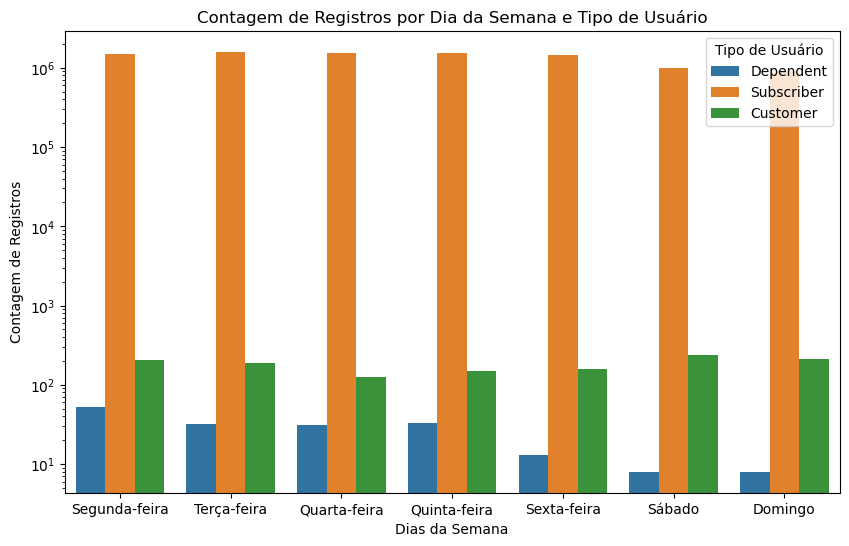

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir a ordem dos dias da semana
ordem_dias_semana = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']

# Agrupar e contar os registros por usertype e nome_dia_semana
tabela_contagem = df.groupby(['usertype', 'nome_dia_semana']).size().reset_index(name='contagem')

# Definir a ordem dos dias da semana como uma categoria categórica
tabela_contagem['nome_dia_semana'] = pd.Categorical(tabela_contagem['nome_dia_semana'], categories=ordem_dias_semana, ordered=True)

# Ordenar o DataFrame pela ordem dos dias da semana
tabela_contagem = tabela_contagem.sort_values(by='nome_dia_semana')

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='nome_dia_semana', y='contagem', hue='usertype', data=tabela_contagem)

# Configurar os rótulos dos eixos e a legenda
plt.xlabel('Dias da Semana')
plt.ylabel('Contagem de Registros')
plt.title('Contagem de Registros por Dia da Semana e Tipo de Usuário')
plt.legend(title='Tipo de Usuário')

# Usar escala logarítmica no eixo y
plt.yscale('log')

# Exibir o gráfico
plt.show()

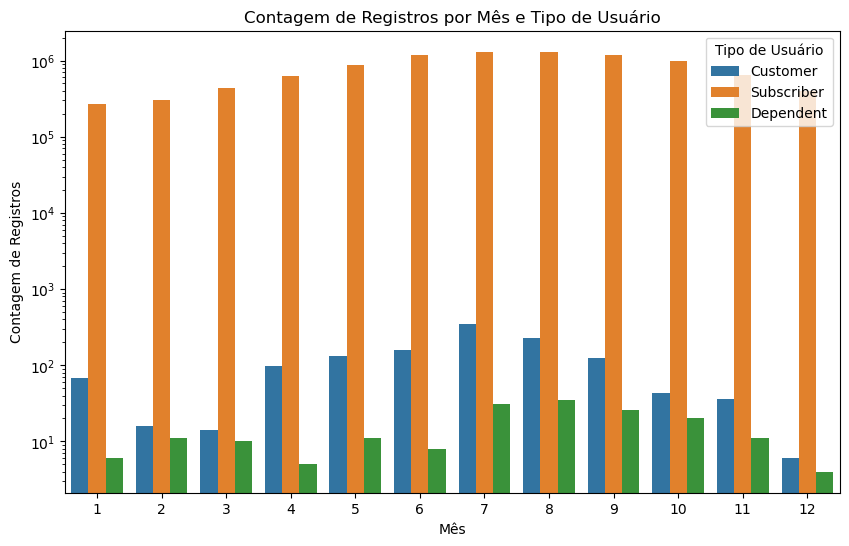

In [26]:
# Definir a ordem dos meses
ordem_meses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Agrupar e contar os registros por usertype e month
tabela_contagem = df.groupby(['usertype', 'month']).size().reset_index(name='contagem')

# Ordenar o DataFrame pela ordem dos meses
tabela_contagem = tabela_contagem.sort_values(by='month', key=lambda x: pd.to_datetime(x, format='%m').dt.month)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='contagem', hue='usertype', data=tabela_contagem)

# Configurar os rótulos dos eixos e a legenda
plt.xlabel('Mês')
plt.ylabel('Contagem de Registros')
plt.title('Contagem de Registros por Mês e Tipo de Usuário')
plt.legend(title='Tipo de Usuário')

# Usar escala logarítmica no eixo y
plt.yscale('log')

# Exibir o gráfico
plt.show()

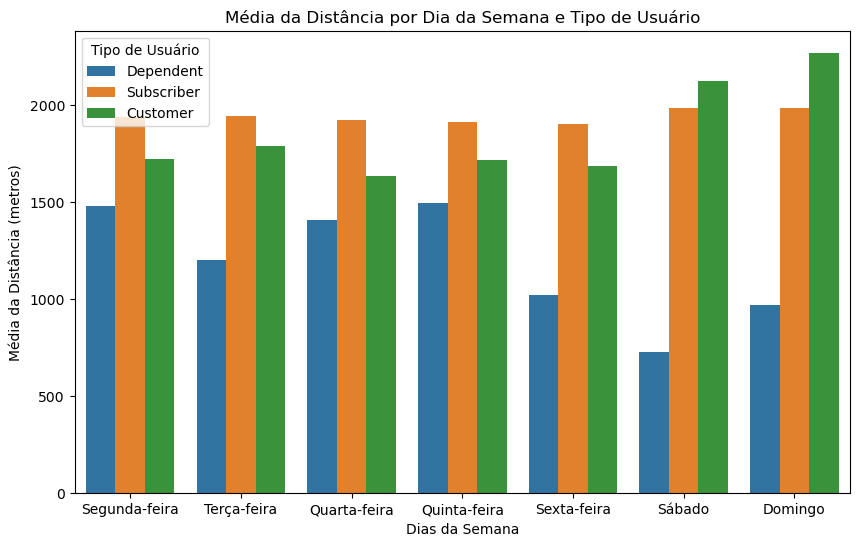

In [27]:
# Agrupar e calcular a média de 'distancia_metros' por usertype e nome_dia_semana
tabela_media = df.groupby(['usertype', 'nome_dia_semana'])['distancia_metros'].mean().reset_index(name='media_distancia')

# Definir a ordem dos dias da semana como uma categoria categórica
tabela_media['nome_dia_semana'] = pd.Categorical(tabela_media['nome_dia_semana'], categories=ordem_dias_semana, ordered=True)

# Ordenar o DataFrame pela ordem dos dias da semana
tabela_media = tabela_media.sort_values(by='nome_dia_semana')

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='nome_dia_semana', y='media_distancia', hue='usertype', data=tabela_media)

# Configurar os rótulos dos eixos e a legenda
plt.xlabel('Dias da Semana')
plt.ylabel('Média da Distância (metros)')
plt.title('Média da Distância por Dia da Semana e Tipo de Usuário')
plt.legend(title='Tipo de Usuário')

# Exibir o gráfico
plt.show()

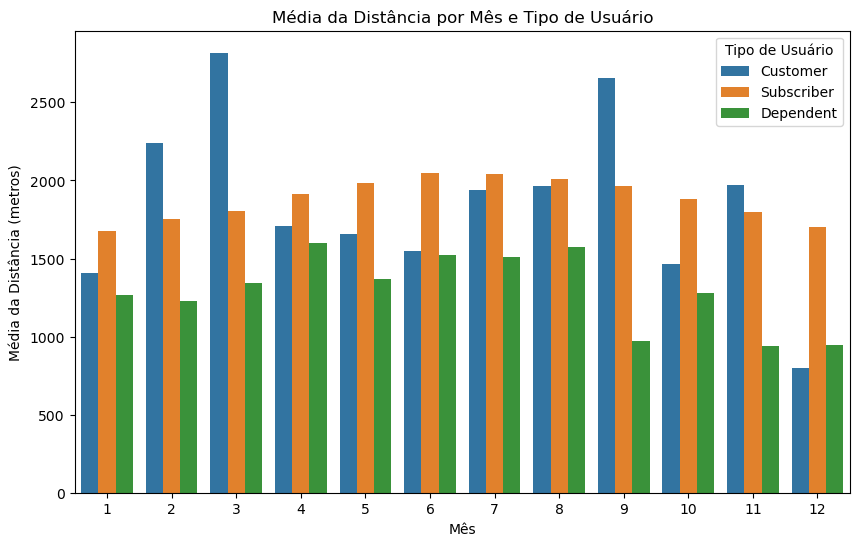

In [28]:
# Agrupar e calcular a média de 'distancia_metros' por usertype e month
tabela_media = df.groupby(['usertype', 'month'])['distancia_metros'].mean().reset_index(name='media_distancia')

# Ordenar o DataFrame pela ordem dos meses
tabela_media = tabela_media.sort_values(by='month')

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='media_distancia', hue='usertype', data=tabela_media)

# Configurar os rótulos dos eixos e a legenda
plt.xlabel('Mês')
plt.ylabel('Média da Distância (metros)')
plt.title('Média da Distância por Mês e Tipo de Usuário')
plt.legend(title='Tipo de Usuário')

# Exibir o gráfico
plt.show()

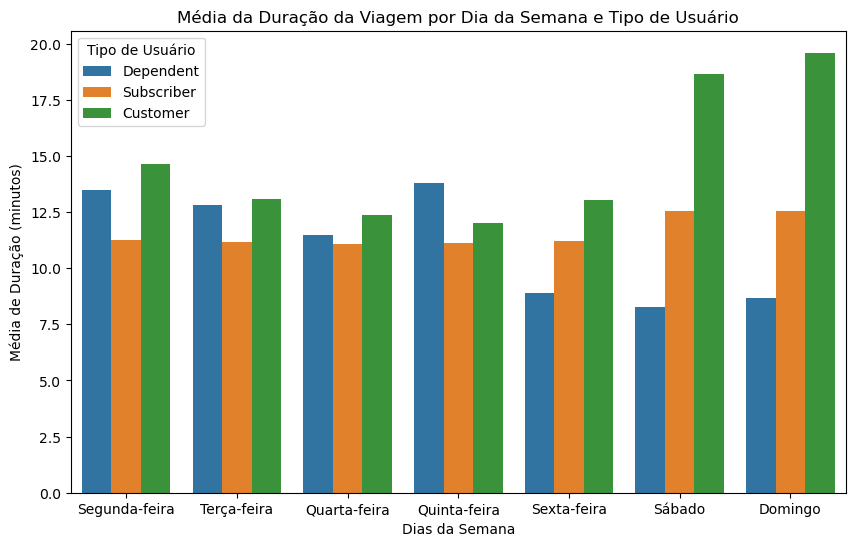

In [29]:
# Agrupar e calcular a média de 'tripduration' por usertype e nome_dia_semana
tabela_media = df.groupby(['usertype', 'nome_dia_semana'])['tripduration'].mean().reset_index(name='media_duracao')

# Definir a ordem dos dias da semana como uma categoria categórica
tabela_media['nome_dia_semana'] = pd.Categorical(tabela_media['nome_dia_semana'], categories=ordem_dias_semana, ordered=True)

# Ordenar o DataFrame pela ordem dos dias da semana
tabela_media = tabela_media.sort_values(by='nome_dia_semana')

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='nome_dia_semana', y='media_duracao', hue='usertype', data=tabela_media)

# Configurar os rótulos dos eixos e a legenda
plt.xlabel('Dias da Semana')
plt.ylabel('Média de Duração (minutos)')
plt.title('Média da Duração da Viagem por Dia da Semana e Tipo de Usuário')
plt.legend(title='Tipo de Usuário')

# Exibir o gráfico
plt.show()

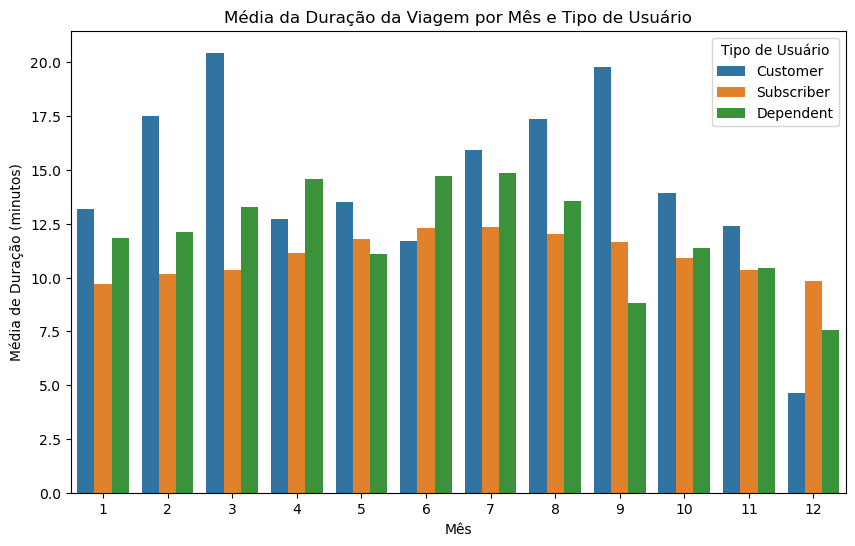

In [30]:
# Agrupar e calcular a média de 'tripduration' por usertype e month
tabela_media = df.groupby(['usertype', 'month'])['tripduration'].mean().reset_index(name='media_duracao')

# Ordenar o DataFrame pela ordem dos meses
tabela_media = tabela_media.sort_values(by='month')

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='media_duracao', hue='usertype', data=tabela_media)

# Configurar os rótulos dos eixos e a legenda
plt.xlabel('Mês')
plt.ylabel('Média de Duração (minutos)')
plt.title('Média da Duração da Viagem por Mês e Tipo de Usuário')
plt.legend(title='Tipo de Usuário')

# Exibir o gráfico
plt.show()

## Conclusion
Os viajantes casuais (Customer) normalmente utilizam a bike por mais tempo e cobrer uma maior distância, o que acredito ser o uso voltado ao lazer. Também pode-se considerar tirar o maior proveito do veículo, tendo em mente que é um período de 24h de uso.
Diferente do uso dos assinantes que é mais pragmático e mais raro aos finais de semana, o que acredito ser similar ao transporte público para trabalho ou escola. Conclue-se que os usuários casuais alugam as bikes para se divertirem e os usuários anuais utilizam como meio de transporte.